In [87]:
from neurora.rdm_cal import ecogRDM, eegRDM
from neurora.rdm_plot import plot_rdm_1, plot_rdm_2
from brainpipe.system import study
import os.path as op
import numpy as np

-> Olfacto loaded


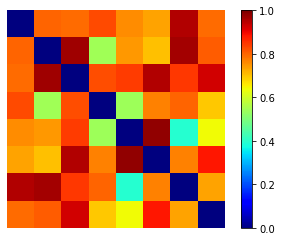

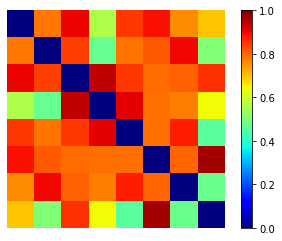

8
(8, 8)
(8, 8)
0.8038067366395734
0.7959640041103029
0.8296916209503722
0.7609586993379679
0.7364677807667717
0.9560405652326834
0.7943197311725023
0.9687625756422898
0.5460597143500409
0.7486373819370227
0.7058823452020779
0.9673723678961154
0.8108243665098593
0.8274518237669315
0.8441847699070412
0.9565115296608679
0.8487907485968738
0.9280866733692051
0.5402898684272974
0.7704761450275212
0.803832429895378
0.6969819374440303
0.9807902147041124
0.3953544730841704
0.6426441215914974
0.7699524836458072
0.8839452826531777
0.7362014953184192
[0.80380674 0.795964   0.82969162 0.7609587  0.73646778 0.95604057
 0.79431973 0.96876258 0.54605971 0.74863738 0.70588235 0.96737237
 0.81082437 0.82745182 0.84418477 0.95651153 0.84879075 0.92808667
 0.54028987 0.77047615 0.80383243 0.69698194 0.98079021 0.39535447
 0.64264412 0.76995248 0.88394528 0.7362015 ]
[0.78320958 0.90554109 0.5609471  0.84894177 0.89073682 0.75830235
 0.7003963  0.84139617 0.47274345 0.78532773 0.81560948 0.90110513
 0.50

In [133]:
st = study('Olfacto')
phases = ['Encoding','Retrieval']

RDMs = []
for phase in phases:
    PATH_POW = op.join(st.path, 'database/{}_By_Odor/'.format(phase))

    su = 'VACJ'
    # odors = list([['10','11','12','13'], ['14','15','16','17']])
    odors = list(['10','11','12','13','14','15','16','17'])
    channels = ["b'2-b'1"]

    all_odors = []
    for od in odors:
        mat = np.load(PATH_POW+'{}_odor_{}_bipo_sel_physFT.npz'.format(su,od))
        data, sf = mat['x'], mat['sf'] #nchan, n_times, trials
        time = (np.arange(data.shape[1])/sf)-3
        chs_ix = [i for i,x in enumerate(mat['channels']) if x in channels]
        t_ix = [i for i,x in enumerate(time) if 0 < x <= 2.1]
        data_sel = data[chs_ix,t_ix[0]:t_ix[-1]+1,:] #nchs,ntimes,ntrials
        data_sel = data_sel.swapaxes(1,-1).swapaxes(0,1)[np.newaxis] #n_trials, n_chans, times
        all_odors.append(data_sel)

    min_tr = np.min([x.shape[1] for x in all_odors])
    concat_all = np.array([])
    for x in all_odors:
        sel = x[:,:min_tr,...]
        concat_all = np.vstack((concat_all,sel)) if np.size(concat_all) else sel
    #RDM for iEEG, opt calculate the RDM for each channel or for each time-point or not
    RDM = ecogRDM(concat_all,len(channels),opt='all') #“channels” or “time” or “all”.
    plot_rdm_1(RDM)
    RDMs.append(RDM)

from neurora.rsa_corr import (rsa_correlation_spearman, rsa_correlation_kendall,
                              rsa_correlation_pearson)
rsa_spear = rsa_correlation_spearman(RDMs[0],RDMs[1])
rsa_pear = rsa_correlation_pearson(RDMs[0],RDMs[1])
rsa_ken = rsa_correlation_kendall(RDMs[0],RDMs[1])
print(rsa_spear)
print(rsa_pear)
print(rsa_ken)